In [1]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import nltk
import spacy
from matplotlib import pyplot as plt
from IPython import display

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/maxim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import re

label = re.compile(r'LABEL=\d+')
operator = re.compile(r'OPER \[.+\] .+$')
client = re.compile(r'CLI \[.+\] .+$')
with open("train.txt") as inp:
    with open("topic_modeling.txt", 'w') as outp:
        for dialog in inp.read().split('\n\n'):
            res_diag = ''
            for line in dialog.split('\n'):
                if line.lower().find("добрый") < 0 and line.lower().find("спасибо") <0 and line.lower().find("оставайтесь") < 0 and line.lower().find("здравствуйте") < 0:
                    pos = line.find("'|'")
                    if pos > -1:
                        line = line[:pos]
                    for clie in client.findall(line):
                        if len(line)>10:
                            res_diag += ' '
                        outp.write(clie[20:])
                    for oper in operator.findall(line):
                        res_diag += ' '
                        res_diag += oper[20:]
            if len(res_diag)>300:
                outp.write(res_diag)
                outp.write('\n')

In [4]:
with open("test.txt") as inp:
    with open("topic_modeling.txt", 'a') as outp:
        for dialog in inp.read().split('\n\n'):
            res_diag = ''
            for line in dialog.split('\n'):
                pos = line.find("'|'")
                if pos > -1:
                    line = line[:pos]
                for clie in client.findall(line):
                    if len(line)>10:
                        res_diag += ' '
                    outp.write(clie[20:])
                for oper in operator.findall(line):
                    res_diag += ' '
                    res_diag += oper[20:]
            if len(res_diag)>300:
                outp.write(res_diag)
                outp.write('\n')

In [5]:
with open("topic_modeling.txt") as inp:
    data = inp.read().split('\n')

In [6]:
data[0]

' уточните пожалуйста на частное лицо или на организацию планирует приобретение авто и куда вас для консультации соединить какая площадка будет удобно пишу представлена войковская станция метро классическая улицей на востоке ерило 2-й 3-й километр мкада дом семь 1 мин пожалуйста я подготовка автомобиля размещение рекламы и общение с покупателями ты наш установите желаемый цену продажи и получите деньги в день обращения новая он-лайн система для автовладельцев говорить можно продаете свой автомобиль берем все забыл ты на себя подготовка автомобиль оперативный отдел Ксения слушаю вас ну это если рассматривать например вариант самой маленький фургона 8-й убого боксе раз и условия скидки протеины то в принципе возможно такая цена зависимости от того какой размер нужен вам если побольше машина то для будет чуть подороже вас устраивает вот Юрий вас устраивает восьмерку Вовы сейчас секундочку и вы как частное лицо да планируете приобретения за наличный или в кредит 2-й день вы будете сдавать 

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [8]:
data_words = list(sent_to_words(data))

In [9]:
stop_words = stopwords.words('russian')

In [10]:
stop_words.extend(['здравствуите', 'компания', 'помочь', 'пожалуиста', 'день', 'добрый', 'угу'])

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['уточните', 'пожалуиста', 'на', 'частное_лицо', 'или', 'на', 'организацию', 'планирует_приобретение', 'авто', 'куда', 'вас', 'для_консультации', 'соединить', 'какая', 'площадка', 'будет', 'удобно', 'пишу', 'представлена', 'воиковская', 'станция_метро', 'классическая', 'улицеи', 'на', 'востоке', 'ерило', 'километр_мкада', 'дом', 'семь', 'мин', 'пожалуиста', 'подготовка', 'автомобиля_размещение_рекламы', 'общение_покупателями_ты', 'наш', 'установите_желаемыи_цену_продажи', 'получите_деньги_день_обращения', 'новая_он_лаин_система', 'для_автовладельцев', 'говорить', 'можно', 'продаете_свои_автомобиль', 'берем', 'все', 'забыл_ты_на', 'себя_подготовка', 'автомобиль', 'оперативныи', 'отдел', 'ксения', 'слушаю', 'вас', 'ну', 'это', 'если', 'рассматривать', 'например', 'вариант', 'самои', 'маленькии', 'фургона', 'убого', 'боксе', 'раз', 'условия', 'скидки', 'протеины', 'то', 'принципе', 'возможно', 'такая', 'цена', 'зависимости_от_того', 'какои', 'размер', 'нужен', 'вам', 'если', 'побольше', '

In [12]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [14]:
nlp = spacy.load('ru_core_news_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['уточните', 'организация', 'планирует_приобретение', 'авто', 'консультация', 'соединить', 'площадка', 'удобно', 'пишу', 'представить', 'воиковская', 'станция_метро', 'классический', 'улицеи', 'ерило', 'дом', 'мина', 'подготовка', 'автомобиль', 'размещение_рекламы', 'установите_желаемыи', 'автовладельцев_говорить', 'автомобиль', 'забыть', 'подготовка', 'автомобиль', 'оперативныи', 'отдел', 'ксения', 'слушать', 'рассматривать', 'например', 'вариант', 'самои', 'маленькии', 'фургон', 'убого', 'бокс', 'условие', 'скидка', 'протеины', 'принципе', 'возможный', 'цена', 'зависимость', 'размер', 'нужный', 'побольше', 'машина', 'подороже', 'устраивать', 'юрии', 'устраивать', 'восьмёрка', 'вовы', 'секундочка', 'планировать', 'приобретение', 'наличныи', 'кредит', 'сдавать', 'машина', 'минута', 'возможный', 'принимать', 'сеичас', 'секундочка', 'посмотреть', 'вариант', 'наличии', 'сеичас', 'цена', 'указать', 'саите', 'возможно', 'год', 'относиться', 'го', 'конкретно', 'остаться', 'новый', 'год', 'п

In [15]:
data_lemmatized = remove_stopwords(data_lemmatized)

In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 4), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1), (30, 2), (31, 4), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 1)

--------------------Topics:9-----------------------
[(0, '0.010*"смотри" + 0.007*"калужскои" + 0.006*"мкад" + 0.006*"метро_калужская" + 0.006*"лошадиный" + 0.006*"сервисный" + 0.006*"обзор" + 0.004*"время_работы" + 0.004*"кресло" + 0.003*"целях_улучшения"'), (1, '0.097*"автомобиль" + 0.054*"спасибо" + 0.047*"подготовка" + 0.039*"забота" + 0.029*"оставаитесь" + 0.025*"менеджер" + 0.023*"линия" + 0.021*"интересовать" + 0.020*"добрыи" + 0.019*"брать"'), (2, '0.031*"автомобиль" + 0.021*"мочь" + 0.020*"кредит" + 0.018*"сеичас" + 0.012*"понять" + 0.010*"номер" + 0.009*"работать" + 0.009*"завтра" + 0.009*"вопрос" + 0.009*"звать"'), (3, '0.026*"договор" + 0.017*"собираетесь" + 0.017*"монтировать" + 0.016*"материал" + 0.013*"работа" + 0.010*"потолок" + 0.010*"опыт" + 0.007*"ремонт" + 0.007*"включить" + 0.006*"уровень"'), (4, '0.037*"пионерский" + 0.030*"сварить" + 0.022*"алтуфьево" + 0.021*"южный" + 0.019*"измаиловское" + 0.016*"череповец" + 0.015*"фаворит" + 0.015*"парк" + 0.015*"измаилово" + 

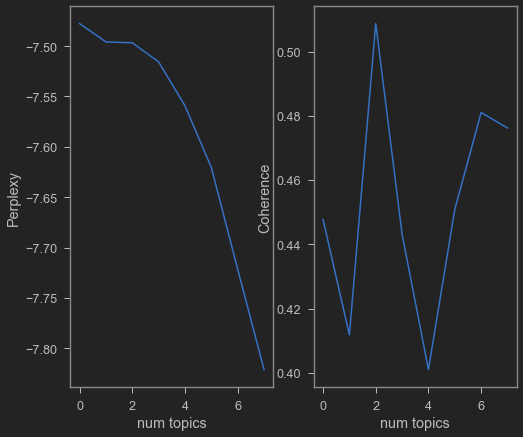

In [17]:
history_perp = []
history_coh = []
fig = plt.figure(figsize=[21, 7], dpi=100)
for i in range(2,10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    display.clear_output(wait=True)
    print('--------------------Topics:%d-----------------------'%i)
    print(lda_model.print_topics())
    perplexity = lda_model.log_perplexity(corpus)
    print('\nPerplexity: ', perplexity)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    history_coh.append(coherence_lda)
    history_perp.append(perplexity)
    plt.subplot(1,2,1)
    plt.xlabel('num topics')
    plt.ylabel('Perplexy')
    plt.plot(history_perp)

    plt.subplot(1,2,2)
    plt.xlabel('num topics')
    plt.ylabel('Coherence')
    plt.plot(history_coh)
    plt.show()

In [18]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [19]:
lda_model.print_topics()

[(0,
  '0.027*"автомобиль" + 0.022*"машина" + 0.018*"сеичас" + 0.016*"комплектация" + 0.013*"год" + 0.012*"смотреть" + 0.011*"скидка" + 0.011*"мочь" + 0.010*"миллион" + 0.009*"сказать"'),
 (1,
  '0.084*"автомобиль" + 0.029*"спасибо" + 0.025*"подготовка" + 0.021*"забота" + 0.016*"интересовать" + 0.015*"менеджер" + 0.014*"оставаитесь" + 0.013*"пробег" + 0.011*"брать" + 0.011*"салон"'),
 (2,
  '0.030*"автомобиль" + 0.025*"звонок" + 0.024*"мочь" + 0.022*"свидание" + 0.019*"сказать" + 0.019*"обращаться" + 0.018*"менеджер" + 0.016*"перезвонить" + 0.016*"планировать" + 0.016*"кредит"'),
 (3,
  '0.008*"работа" + 0.008*"нажмите" + 0.007*"материал" + 0.007*"ремонт" + 0.005*"потолок" + 0.004*"работать" + 0.004*"запись" + 0.003*"таганка" + 0.003*"дверь" + 0.003*"фильтр"'),
 (4,
  '0.025*"миллион" + 0.018*"автомобиль" + 0.016*"смотреть" + 0.014*"идти" + 0.013*"рассрочка" + 0.013*"стоить" + 0.013*"получаться" + 0.011*"год" + 0.011*"минус" + 0.010*"скидка"')]

In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.515654520692918

Coherence Score:  0.4430974818392258


In [21]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt

In [22]:
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/home/maxim/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.176807 -0.017415       1        1  61.338899
2      0.017347 -0.203972       2        1  16.075365
1      0.158859 -0.114726       3        1  11.485570
4     -0.193586  0.120133       4        1   9.304962
3      0.194188  0.215979       5        1   1.795203, topic_info=             Term         Freq        Total Category  logprob  loglift
1      автомобиль  4512.000000  4512.000000  Default  30.0000  30.0000
32        миллион  1172.000000  1172.000000  Default  29.0000  29.0000
9587      спасибо   598.000000   598.000000  Default  28.0000  28.0000
361        звонок   701.000000   701.000000  Default  27.0000  27.0000
83       свидание   545.000000   545.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2102       мастер     6.366528    21.962785   Topic5  -5.9667   2.7818
77       работать    10.186995   277.214449   Topic5  -5.4967   0.7164
2399       проект     4.483057    17.248063   Topic5  -6.3175   2.6727
985        делать     5.025623   169.659959   Topic5  -6.2032   0.5008
3837  происходить     4.024653    13.171575   Topic5  -6.4253   2.8344

[325 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
572       3  0.983986  автовладелец
295       1  0.963003       автомат
295       2  0.025795       автомат
295       3  0.008598       автомат
1         1  0.503734    автомобиль
...     ...       ...           ...
1173      4  0.969290      шестьсот
294       1  0.273869         шкода
294       2  0.027387         шкода
294       3  0.693801         шкода
2583      2  0.991316         южный

[453 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 5, 4])

/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alterna